# Homework 5

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of th eplot to something useful
plt.rcParams["figure.figsize"] = (15,10)

### Problem 1a

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest $\sigma$, say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the $P(signal)$ in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have $P(data|signal)P(signal)$.
Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it. Here is the code I used for the plot in class:

In [3]:
# Creating a normal distribution with a million data

mu, sigma = 0, 3 # choosing my sigma to be 3
bkg = np.random.normal(mu, sigma, 1000000)

# Create some signal using uniform distribution
# The signals will have a random strenght on the interval of 0-20.
signal = np.random.uniform(0,20, 1000000)


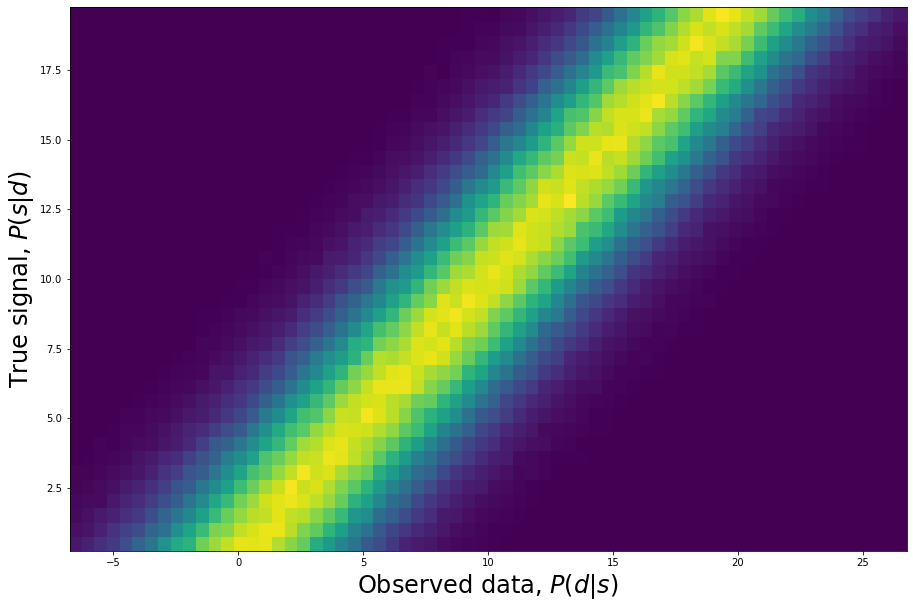

In [4]:
# Create a fake data which contains the singal free background and the signals
data = bkg + signal
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data, signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);

### Problem 1b

Select a true injected signal and plot $P(d|s)$. (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. 

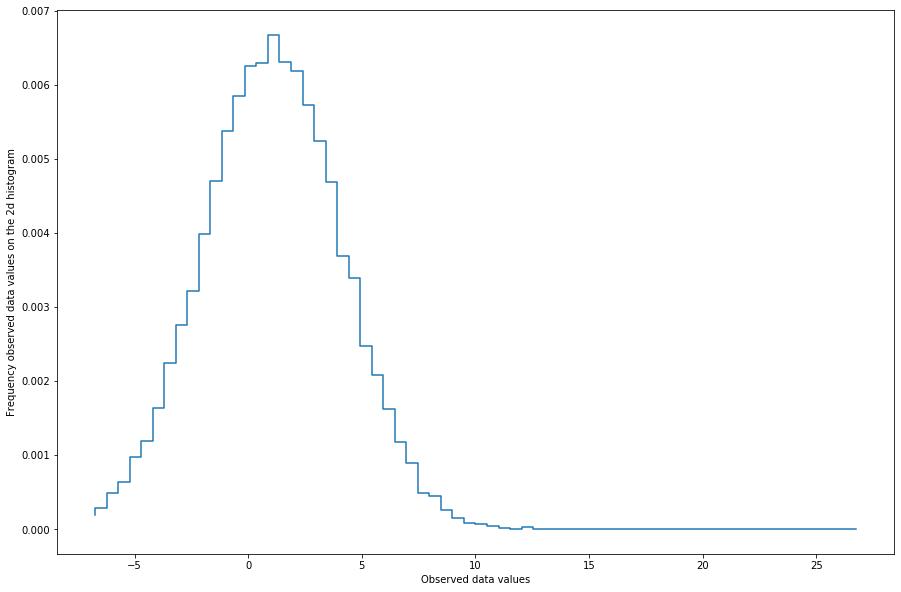

In [5]:
horizontal = Psd[:,2]
plt.step(datacenters, horizontal)
plt.xlabel("Observed data values")
plt.ylabel("Frequency observed data values on the 2d histogram");

The plot shows the frequency of the possible observable value if the signal value happens to be 1.5. Since the 2D histogram shows the frequency of data for a range of observable values and for a range of signal values.  If I want to find a range of all possible observable data values for a specific signal value, I need to cut a horizontal stripe off the 2D histogram. This is the plot of that single horizontal stripe. From this plot, we can see that any observable data values between 0 to 2 has the highest frequency. 

### Problem 1c

Select an observed data value and plot $P(s|d)$. (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

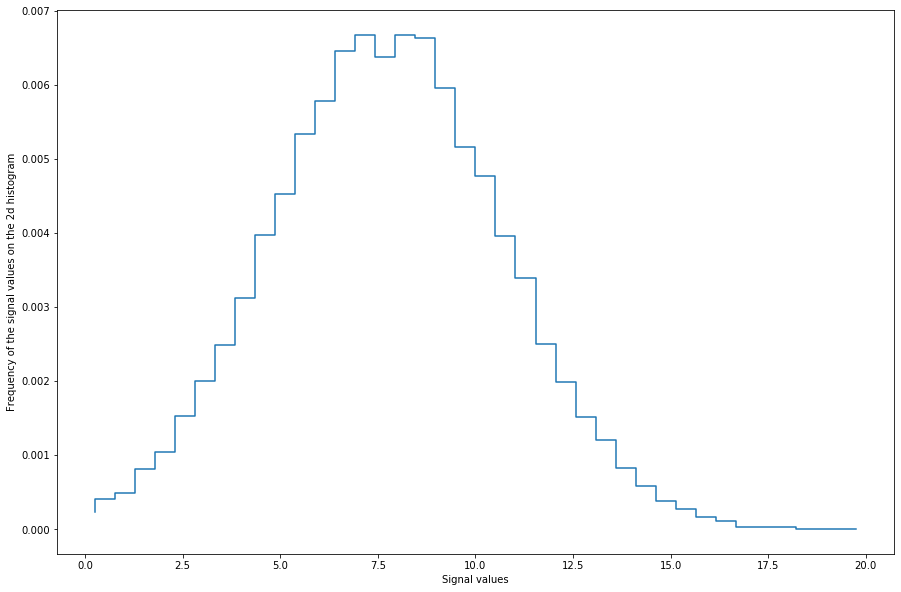

In [6]:
vertical = Psd[29,:]
plt.step(signalcenters,vertical)
plt.xlabel("Signal values")
plt.ylabel("Frequency of the signal values on the 2d histogram");

The plot shows the frequency of the possible signal values if the observed value happens to be 8. Since the 2D histogram shows the frequency of data for a range of observable values and for a range of signal values.  If I want to find a range of all possible signal values for a specific observed value, I need to cut a vertical stripe off the 2D histogram. This is the plot of that single vertical stripe. From this plot, we can see that any signal values between 6.5 to 8.5 has high frequency. So if I think i had a signal value of 8, the most likely observable values are something between 6.5 to 8.5.

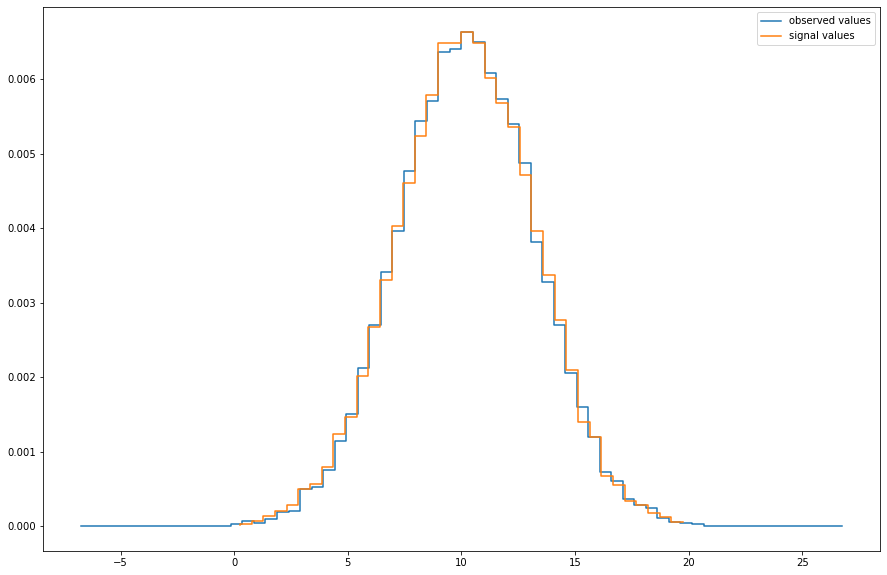

In [7]:
horizontal = Psd[:,20]
plt.step(datacenters, horizontal, label = 'observed values')
vertical = Psd[34,:]
plt.step(signalcenters,vertical,label = 'signal values')
plt.legend();

When we have a zero mean gaussian distribution like this, we can see that peak of the distributions overlaps at the same value, 10.  

# Problem 2
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of $\sigma$]. Reproduce the graphs above. Lastly overplot the $P(d|s)$ and $P(s|d)$ plots. Why are they not centered on the same value? Explain carefully.

In [8]:
# Creating a normal distribution with a million data
mu, sigma = 7, 3 # choosing my sigma to be 3
bkg = np.random.normal(mu, sigma, 1000000)

# Create some signal using uniform distribution
signal = np.random.uniform(0,20, 1000000)

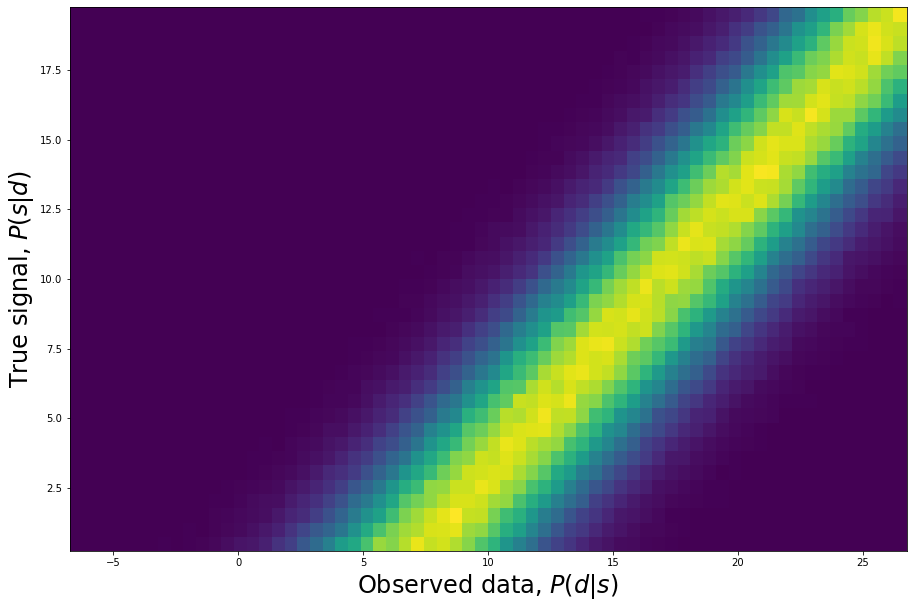

In [9]:
# Create a fake data which contains the singal free background and the signals
data = bkg + signal

signaledges = np.linspace(0,20,40) # 40
dataedges = np.linspace(-7,27,68) # 68

Psd, temp, temp2= np.histogram2d(data, signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);

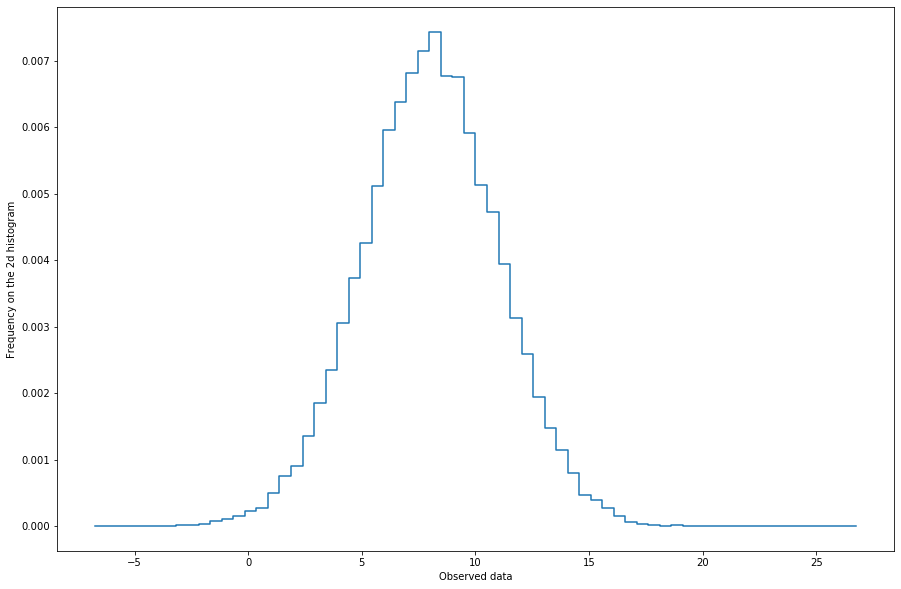

In [10]:
horizontal = Psd[:,2]
plt.step(datacenters, horizontal)
plt.xlabel("Observed data")
plt.ylabel("Frequency on the 2d histogram");

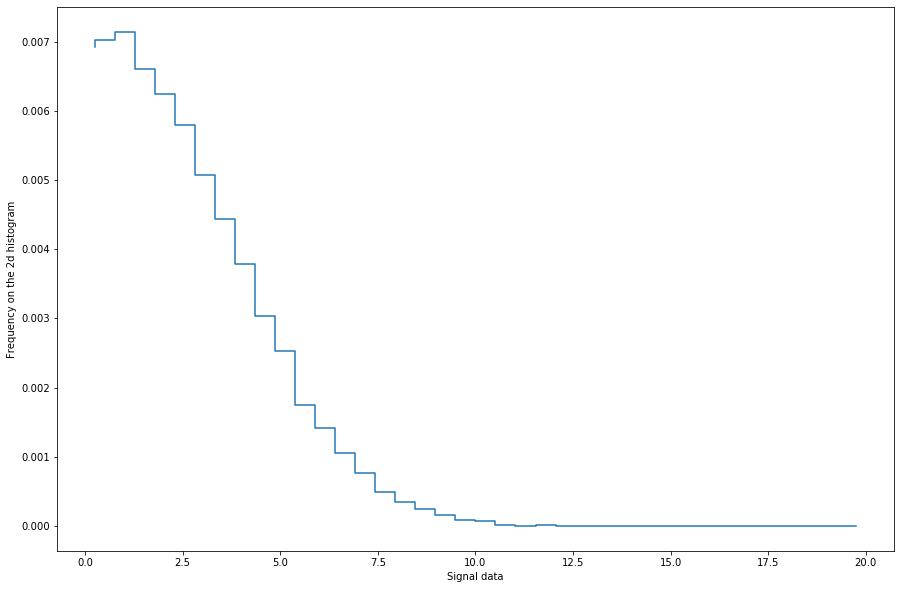

In [11]:
vertical = Psd[29,:]
plt.step(signalcenters,vertical)
plt.xlabel("Signal data")
plt.ylabel("Frequency on the 2d histogram");

In [ ]:
horizontal = Psd[:,20]
vertical = Psd[34,:]

plt.step(datacenters, horizontal, label='P(d|s)')
plt.step(signalcenters,vertical, label='P(s|d)');
plt.xlabel("Signal or Observed values")
plt.ylabel("Frequency on the 2d histogram");
plt.legend();

When we have a non-zero mean gaussian distributions, we can see that the two distributions will not overlap at the same value. When the gaussian distribution does not have a zero mean, they are shifted by the set mean value. Each Gaussian distribution with a different range of data values will be shifted to different degree so it will no longer look symmetric. This is very clear in the 2D histrogram. The diagonal peak frequency line is shifted to the right of the histogram. Due to this non symmetry in the two distributions, the peak of the two distributions no longer overlap at the  same value.